In [5]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

from pathlib import Path

from statsmodels.tsa.seasonal import STL

In [2]:
path = Path().absolute().parent.parent / "data" / "raw" / "data_magnetics.nc"
ds = xr.open_dataset(path)

In [3]:
ds

<xarray.Dataset> Size: 13GB
Dimensions:                                   (time: 12877819,
                                               b_field_pol_probe_cc_channel: 5,
                                               b_field_pol_probe_ccbv_channel: 40,
                                               b_field_pol_probe_obr_channel: 18,
                                               b_field_pol_probe_obv_channel: 18,
                                               b_field_pol_probe_omv_channel: 3,
                                               b_field_tor_probe_cc_channel: 3,
                                               b_field_tor_probe_saddle_field_channel: 12,
                                               b_field_tor_probe_saddle_voltage_channel: 12,
                                               flux_loop_channel: 15)
Coordinates:
  * b_field_pol_probe_cc_channel              (b_field_pol_probe_cc_channel) <U13 260B ...
  * b_field_pol_probe_ccbv_channel            (b_field_pol_probe_ccbv_channel) <U10 2kB ...
  * b_field_pol_probe_obr_channel             (b_field_pol_probe_obr_channel) <U9 648B ...
  * b_field_pol_probe_obv_channel             (b_field_pol_probe_obv_channel) <U9 648B ...
  * b_field_pol_probe_omv_channel             (b_field_pol_probe_omv_channel) <U11 132B ...
  * b_field_tor_probe_cc_channel              (b_field_tor_probe_cc_channel) <U13 156B ...
  * b_field_tor_probe_saddle_field_channel    (b_field_tor_probe_saddle_field_channel) <U11 528B ...
  * b_field_tor_probe_saddle_voltage_channel  (b_field_tor_probe_saddle_voltage_channel) <U15 720B ...
  * flux_loop_channel                         (flux_loop_channel) <U12 720B '...
  * time                                      (time) float64 103MB -0.0692 .....
Data variables:
    b_field_pol_probe_cc_field                (time, b_field_pol_probe_cc_channel) float64 515MB ...
    b_field_pol_probe_ccbv_field              (time, b_field_pol_probe_ccbv_channel) float64 4GB ...
    b_field_pol_probe_obr_field               (time, b_field_pol_probe_obr_channel) float64 2GB ...
    b_field_pol_probe_obv_field               (time, b_field_pol_probe_obv_channel) float64 2GB ...
    b_field_pol_probe_omv_voltage             (time, b_field_pol_probe_omv_channel) float64 309MB ...
    b_field_tor_probe_cc_field                (time, b_field_tor_probe_cc_channel) float64 309MB ...
    b_field_tor_probe_saddle_field            (time, b_field_tor_probe_saddle_field_channel) float64 1GB ...
    b_field_tor_probe_saddle_voltage          (time, b_field_tor_probe_saddle_voltage_channel) float64 1GB ...
    flux_loop_flux                            (time, flux_loop_channel) float64 2GB ...
    ip                                        (time) float64 103MB ...
    shot_index                                (time) int64 103MB ...
Attributes:
    description:  
    imas:         magnetics
    label:        Plasma Current
    name:         magnetics
    uda_name:     AMC_PLASMA CURRENT
    units:        A

In [36]:
ip_selected = ds["ip"].isel(time=slice(1025500, 1040500))

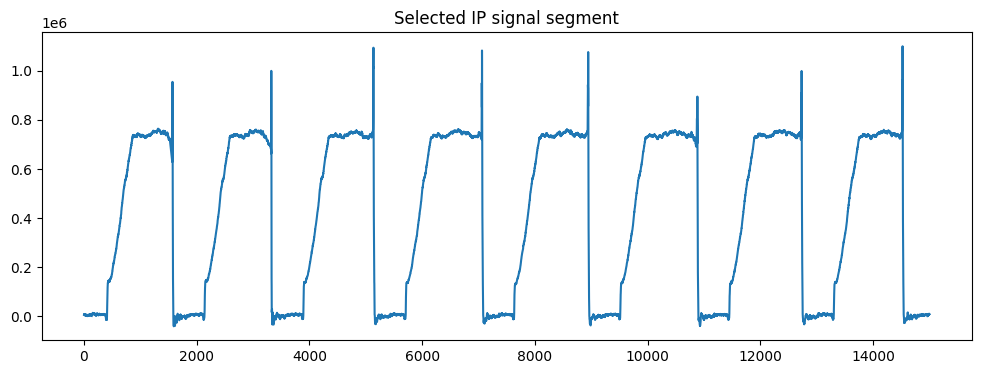

In [37]:
plt.figure(figsize=(12, 4))
plt.plot(ip_selected.values)
plt.title("Selected IP signal segment")
plt.show()

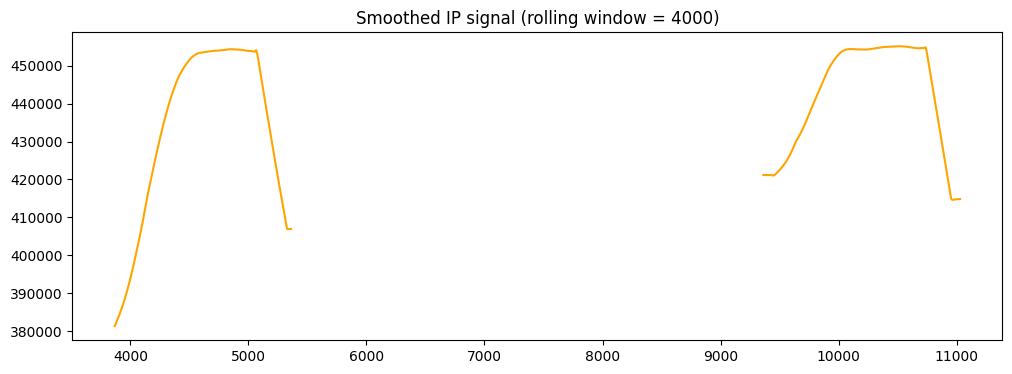

In [57]:
# Do a rolling mean to smooth the signal
rolling_window = 4000
ip_smoothed = ip_selected.rolling(time=rolling_window, center=True).mean()
plt.figure(figsize=(12, 4))
plt.plot(ip_smoothed.values, color="orange")
plt.title(f"Smoothed IP signal (rolling window = {rolling_window})")
plt.show()

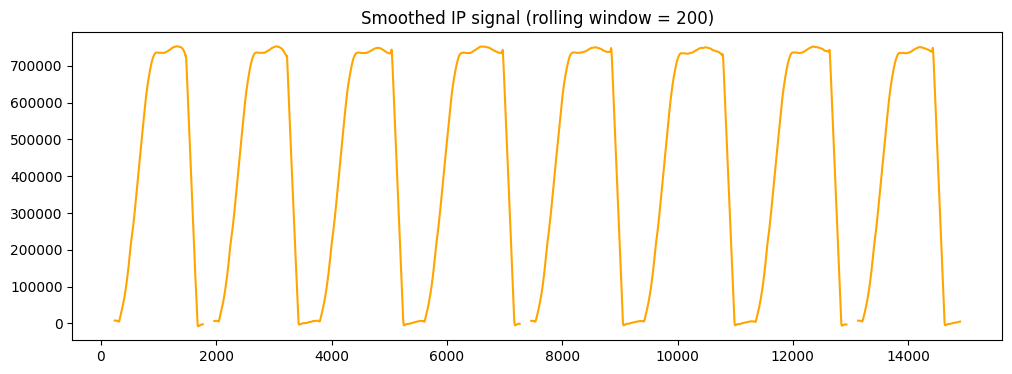

In [52]:
# Do a rolling mean to smooth the signal
rolling_window = 200
ip_smoothed = ip_selected.rolling(time=rolling_window, center=True).mean()
plt.figure(figsize=(12, 4))
plt.plot(ip_smoothed.values, color="orange")
plt.title(f"Smoothed IP signal (rolling window = {rolling_window})")
plt.show()

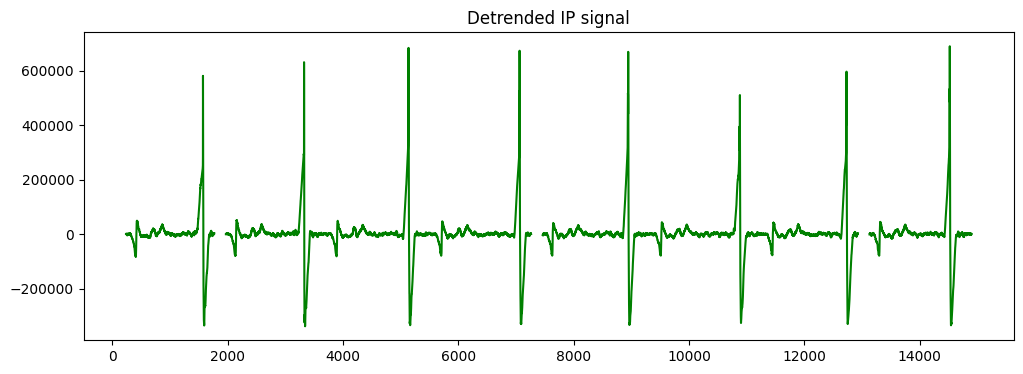

In [53]:
# Substract the smoothed signal from the original to get detrended signal
ip_detrended = ip_selected - ip_smoothed
plt.figure(figsize=(12, 4))
plt.plot(ip_detrended.values, color="green")
plt.title("Detrended IP signal")
plt.show()

In [46]:
stl = STL(ip_selected, seasonal=5)
res = stl.fit()
fig = res.plot()

ValueError: Unable to determine period from endog